In [1]:
import pandas as pd
df = pd.read_csv('c:/data/time/data2.csv')
df.head()

,date,price
0,1991-01-01,12588862
1,1991-02-01,12154321
2,1991-03-01,14337072
3,1991-04-01,15108570
4,1991-05-01,17225734


               price
date                
1991-01-31  12588862
1991-02-28  12154321
1991-03-31  14337072
1991-04-30  15108570
1991-05-31  17225734


<AxesSubplot:xlabel='date'>

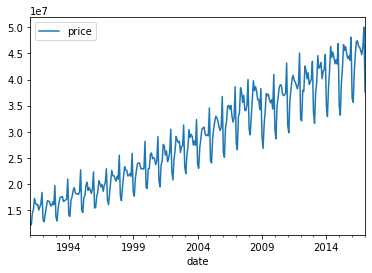

In [2]:
# 전처리
from pandas.tseries.offsets import MonthEnd
# 문자열 변수 date를 datetime 타입으로 바꾸고 MonthEnd(1)을 더하여 해당 월의 마지막 날짜로 지정
df['date'] = pd.to_datetime(df['date']) + MonthEnd(1)
# 이 날짜를 index로 설정(date)
df = df.set_index('date')
print(df.head())
df.plot()

# 인덱스가 0,1,2,3 ...에서 날짜로 변경됨
# 학습할 변수는 date

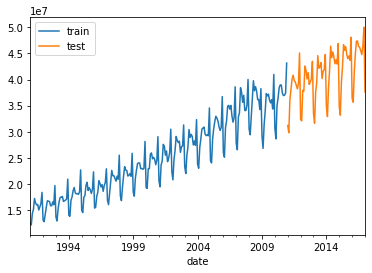

In [3]:
import matplotlib.pyplot as plt
split_date = pd.Timestamp('01-01-2011') # 기준일자
# 학습용 : 2011/1/1까지의 자료
# 검증용 : 이후 자료
train = df.loc[:split_date, ['price']]
test = df.loc[split_date:, ['price']]
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])


In [4]:
from sklearn.preprocessing import MinMaxScaler # 0.0~1.0 사이로 낮춤
# 스케일링
sc = MinMaxScaler()
sc.fit(train)
train_sc = sc.transform(train)
test_sc = sc.transform(test)
train_sc[:10]

array([[0.01402033],
       [0.        ],
       [0.0704258 ],
       [0.09531795],
       [0.16362761],
       [0.13514108],
       [0.12395846],
       [0.12617398],
       [0.09230917],
       [0.11139526]])

In [5]:
# 넘파이배열을 데이터프레임으로 변환
train_sc_df = pd.DataFrame(train_sc, columns=['Scaled'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Scaled'], index=test.index)
train_sc_df.head()

,Scaled
date,
1991-01-31,0.014020
1991-02-28,0.000000
1991-03-31,0.070426
1991-04-30,0.095318
1991-05-31,0.163628


In [6]:
s = pd.Series([100, 200, 300])
s2 = s.shift(1) # 아래로 한칸 내려줌
print(s)
print(s2)

0    100
1    200
2    300
dtype: int64
0      NaN
1    100.0
2    200.0
dtype: float64


In [16]:
for s in range(1, 13):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['Scaled'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['Scaled'].shift(s)
train_sc_df
# 과거값 12개로 현재값을 예측하고자 함

,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
date,,,,,,,,,,,,,
1991-01-31,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-02-28,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-03-31,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-04-30,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-05-31,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-08-31,0.814394,0.863983,0.865311,0.847598,0.784536,0.736050,0.531665,0.597349,0.929722,0.716290,0.773687,0.754447,0.770968
2010-09-30,0.799167,0.814394,0.863983,0.865311,0.847598,0.784536,0.736050,0.531665,0.597349,0.929722,0.716290,0.773687,0.754447
2010-10-31,0.802101,0.799167,0.814394,0.863983,0.865311,0.847598,0.784536,0.736050,0.531665,0.597349,0.929722,0.716290,0.773687


In [8]:
# 결측값 NaN 제거
# 독립변수 : shift_1 ~ shift_12
X_train = train_sc_df.dropna().drop('Scaled', axis=1)
# 종속변수 : Scaled
y_train = train_sc_df.dropna()[['Scaled']]
X_test = test_sc_df.dropna().drop('Scaled', axis=1)
y_test = test_sc_df.dropna()[['Scaled']]

In [9]:
# 넘파이배열로 저장
X_train = X_train.values
X_test= X_test.values
y_train = y_train.values
y_test = y_test.values
# print(X_train.shape)
print(X_train)
# print(y_train_shape)
print(y_train)

[[0.20091289 0.13173822 0.11139526 ... 0.0704258  0.         0.01402033]
 [0.03002688 0.20091289 0.13173822 ... 0.09531795 0.0704258  0.        ]
 [0.01999285 0.03002688 0.20091289 ... 0.16362761 0.09531795 0.0704258 ]
 ...
 [0.79916654 0.81439355 0.86398323 ... 0.92972161 0.71629034 0.77368724]
 [0.80210057 0.79916654 0.81439355 ... 0.59734863 0.92972161 0.71629034]
 [0.81482896 0.80210057 0.79916654 ... 0.53166512 0.59734863 0.92972161]]
[[0.03002688]
 [0.01999285]
 [0.06596369]
 [0.10983126]
 [0.14912986]
 [0.14718865]
 [0.14464787]
 [0.11898427]
 [0.11802682]
 [0.14222108]
 [0.12459168]
 [0.24290801]
 [0.04899091]
 [0.02408276]
 [0.09865054]
 [0.14480155]
 [0.17061844]
 [0.17067229]
 [0.17603636]
 [0.1449117 ]
 [0.14957943]
 [0.15381982]
 [0.16036484]
 [0.28308682]
 [0.05971347]
 [0.05306762]
 [0.15199345]
 [0.17230214]
 [0.21246911]
 [0.23131079]
 [0.1982186 ]
 [0.19187716]
 [0.19381714]
 [0.18857277]
 [0.20528237]
 [0.33988685]
 [0.08949179]
 [0.07634802]
 [0.17110473]
 [0.181320

In [10]:
# 순환신경망에 입력하기 위하여 케라스에 필요한 3차원 형태로 변환
# RNN에는 시간 개념이 있기 때문에 차원이 추가됨
# [size,timestep, 변수개수]
X_train_t = X_train.reshape(X_train.shape[0], 12, 1)
X_test_t = X_test.reshape(X_test.shape[0], 12, 1)
print("최종 DATA")
print(X_train_t.shape)
print(X_train_t)
print(y_train)

최종 DATA
(228, 12, 1)
[[[0.20091289]
  [0.13173822]
  [0.11139526]
  ...
  [0.0704258 ]
  [0.        ]
  [0.01402033]]

 [[0.03002688]
  [0.20091289]
  [0.13173822]
  ...
  [0.09531795]
  [0.0704258 ]
  [0.        ]]

 [[0.01999285]
  [0.03002688]
  [0.20091289]
  ...
  [0.16362761]
  [0.09531795]
  [0.0704258 ]]

 ...

 [[0.79916654]
  [0.81439355]
  [0.86398323]
  ...
  [0.92972161]
  [0.71629034]
  [0.77368724]]

 [[0.80210057]
  [0.79916654]
  [0.81439355]
  ...
  [0.59734863]
  [0.92972161]
  [0.71629034]]

 [[0.81482896]
  [0.80210057]
  [0.79916654]
  ...
  [0.53166512]
  [0.59734863]
  [0.92972161]]]
[[0.03002688]
 [0.01999285]
 [0.06596369]
 [0.10983126]
 [0.14912986]
 [0.14718865]
 [0.14464787]
 [0.11898427]
 [0.11802682]
 [0.14222108]
 [0.12459168]
 [0.24290801]
 [0.04899091]
 [0.02408276]
 [0.09865054]
 [0.14480155]
 [0.17061844]
 [0.17067229]
 [0.17603636]
 [0.1449117 ]
 [0.14957943]
 [0.15381982]
 [0.16036484]
 [0.28308682]
 [0.05971347]
 [0.05306762]
 [0.15199345]
 [0.172

In [11]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(LSTM(20, input_shape=(12, 1))) # (timestep, 변수개수)
model.add(Dense(1)) # 출력층의 노드 개수 1
# mean_squared_error 연속적인 값 예측
model.compile(loss='mse', optimizer='adam')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20)                1760      
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(X_train_t, y_train, epochs=250, batch_size=64, verbose=1)


Epoch 1/250
4/4 [==============================] - 0s 12ms/step - loss: 0.0010
Epoch 2/250
4/4 [==============================] - 0s 12ms/step - loss: 0.0010
Epoch 3/250
4/4 [==============================] - 0s 12ms/step - loss: 0.0010
Epoch 4/250
4/4 [==============================] - 0s 15ms/step - loss: 0.0010
Epoch 5/250
4/4 [==============================] - 0s 6ms/step - loss: 0.0010
Epoch 6/250
4/4 [==============================] - 0s 7ms/step - loss: 0.0011
Epoch 7/250
4/4 [==============================] - 0s 8ms/step - loss: 0.0011
Epoch 8/250
4/4 [==============================] - 0s 7ms/step - loss: 0.0012
Epoch 9/250
4/4 [==============================] - 0s 7ms/step - loss: 0.0011
Epoch 10/250
4/4 [==============================] - 0s 6ms/step - loss: 0.0010
Epoch 11/250
4/4 [==============================] - 0s 7ms/step - loss: 9.7488e-04
Epoch 12/250
4/4 [==============================] - 0s 7ms/step - loss: 0.0010
Epoch 13/250
4/4 [==============================] - 0

In [13]:
score=model.evaluate(X_test_t, y_test, verbose=0)
print(score) #평균제곱오차
y_pred = model.predict(X_test_t)
print(y_pred.flatten()[:10])
print(y_test.flatten()[:10])

0.001189938629977405
2/2 [==============================] - 0s 5ms/step
[0.6669202  0.62990415 0.80540586 0.8624457  0.9198395  0.9436625
 0.9191606  0.9111291  0.8925489  0.8771867 ]
[0.65198848 0.6431242  0.83176496 0.82666946 0.98182284 0.95616179
 0.90265615 0.94107108 0.86841056 0.88189991]


In [19]:
import numpy as np
# 실제값 - 예측값 = 오차
np.mean(y_test.flatten() - y_pred)

0.012382785029266577

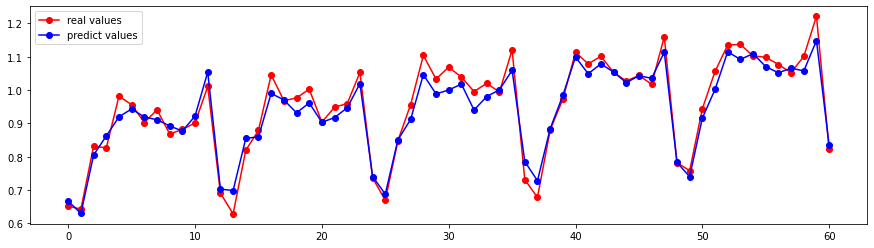

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 4))
# 실제값
plt.plot(y_test.flatten(), 'ro-', label='real values')
# 예측값
plt.plot(y_pred.flatten(), 'bo-', label='predict values')
plt.legend()
plt.show()